<a href="https://colab.research.google.com/github/williambjames/class-projects/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#RaspberryCanary
#Last Edited: Oct 30th
#Challenge 4
import time
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
from shapely.geometry import MultiPoint, Point, Polygon

In [ ]:
map = pd.read_csv('/content/us_outline.csv')
df = open('/content/data.csv','r')
df = df.read()
df = df.split('\n')

for i in range(0,len(df)):
  df[i] = df[i].split(',')
  for element in range(0,3):
    df[i][element] = float(df[i][element])

In [ ]:
k = int(input('Enter a value for k: '))

Enter a value for k: 5


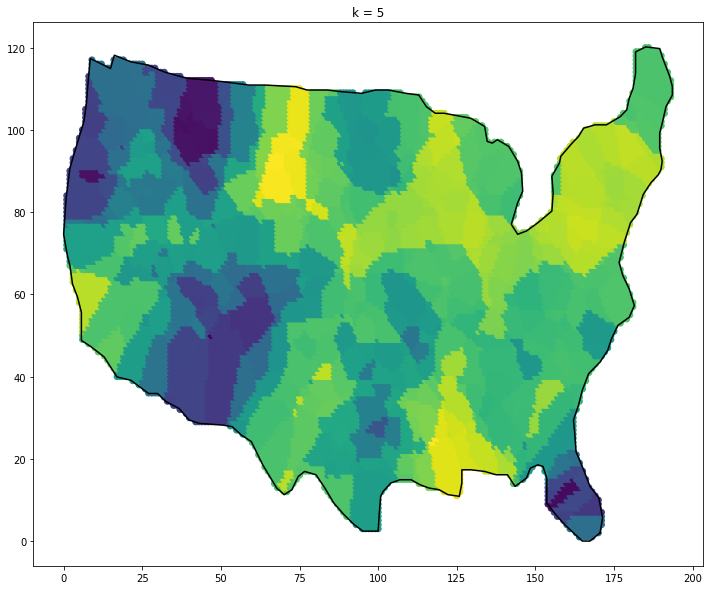

In [ ]:
inside = []
dist = []
change = []
values = []
x_pt = []
y_pt = []

coords = list(zip(map.x,map.y))
us_pol = Polygon(coords)


for row in range(0,121): #Y coord
  for col in range(0,195): #X coord
    for i in range(0,len(df)):
      dist.append((math.sqrt(math.pow(col-df[i][0],2)+math.pow(row-df[i][1],2))) )
      change.append(df[i][2])
    l = list(zip(dist,change))
    l.sort()
    neighbors = np.array(l)
    values.append(neighbors[0:k,1].mean())
    x_pt.append(col)
    y_pt.append(row)


    if us_pol.contains(Point(col,row)):
      inside.append(1)
    else:
      inside.append(0)
    dist.clear()
    change.clear()

df2 = pd.DataFrame(list(zip(x_pt,y_pt,values,inside)),columns =['x_pt', 'y_pt','vals','inside']) 
df2 = df2.loc[(df2['inside']==1)]
    


fig, ax = plt.subplots(figsize=(12,10))

plt.plot(map.x,map.y,c='k')
plt.title(f'k = {k}')
plt.scatter(df2.x_pt,df2.y_pt,c=df2.vals)    
